In [3]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

import time
import psutil
import os

import experimental_mapper as m

dataset_dir = Path("./logs/2024-11-09_09-58")

In [5]:
process = psutil.Process(os.getpid())

mapperV3 = m.ExperimentalMapper_KeyPointWarping()
init_time = time.time()
for frame in range(400, 661, 20):
    img = cv2.cvtColor(
        cv2.imread(str(dataset_dir / f"{frame}.jpg")), cv2.COLOR_RGB2RGBA
    )

    start_time = time.time()
    mapperV3.stitch(img)
    end_time = time.time()
    memory_info = process.memory_info()
    print(
        f"V3 [Frame {frame}]: {end_time - start_time:.2f}s {memory_info.rss / (1024**3):.3f}GB {memory_info.vms / (1024**3):.3f}GB"
    )
final_time = time.time()
print(f"V3 [Overall]: {final_time - init_time:.2f}s")

V3 [Frame 400]: 0.31s 0.576GB 3.370GB
MAPPING [Internal]: Detecting
MAPPING [Internal]: Matching
(33502, 128) (34395, 128)
MAPPING [Internal]: Finding homography
MAPPING [Internal]: Translating homography
MAPPING [Internal]: Warping image
V3 [Frame 420]: 1.05s 0.718GB 3.456GB
MAPPING [Internal]: Detecting
MAPPING [Internal]: Matching
(34395, 128) (35953, 128)
MAPPING [Internal]: Finding homography
MAPPING [Internal]: Translating homography
MAPPING [Internal]: Warping image
V3 [Frame 440]: 1.49s 3.216GB 5.838GB
MAPPING [Internal]: Detecting
MAPPING [Internal]: Matching
(35953, 128) (33685, 128)
MAPPING [Internal]: Finding homography
MAPPING [Internal]: Translating homography
MAPPING [Internal]: Warping image
V3 [Frame 460]: 19.84s 3.329GB 5.942GB
MAPPING [Internal]: Detecting
MAPPING [Internal]: Matching
(33685, 128) (36063, 128)
MAPPING [Internal]: Finding homography
MAPPING [Internal]: Translating homography
MAPPING [Internal]: Warping image
V3 [Frame 480]: 20.03s 3.482GB 6.026GB
MAPP

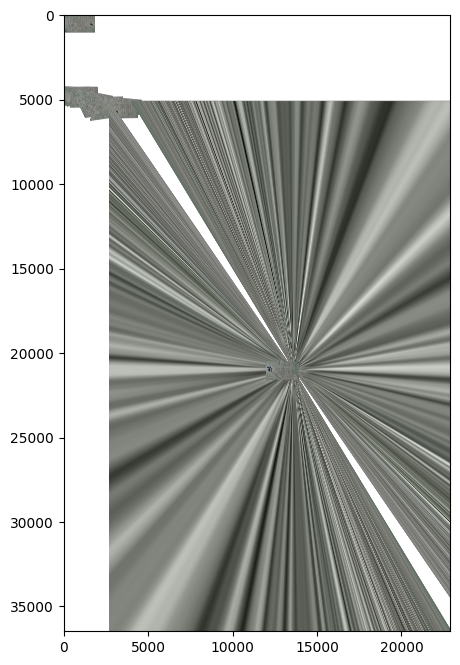

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mapperV3.get_raw_map()[:, :, [2, 1, 0, 3]])